<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Logistic Regression</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 939eb898466ee5be6cdb199e36915f5d2e2df668

matplotlib: 3.3.2
watermark : 2.1.0
numpy     : 1.20.1
pandas    : 1.2.2
json      : 2.0.9
seaborn   : 0.11.0



In [3]:
plt.style.use('./d4sci.mplstyle')

## Load the dataset

In [4]:
data = pd.read_csv('data/iris.csv', delimiter=',', header=0)

Quick visualization of the data. Always a good way to make sure we have what we expect

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Set the labels. We will try to predict the 'virginica' label

In [6]:
data['y'] = 0
data.loc[data['species'] == 'virginica', 'y'] = 1

Extract the data as arrays

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,y
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [8]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].values
y = data['y'].values.reshape(-1,1)

## Utility functions

Logistic function

In [9]:
def logistic(z):
    return 1./(1+np.exp(-z))

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1)

Now we have a few more features

In [11]:
print(X)

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.4 3.7 1.5 0.2]
 [1.  4.8 3.4 1.6 0.2]
 [1.  4.8 3.  1.4 0.1]
 [1.  4.3 3.  1.1 0.1]
 [1.  5.8 4.  1.2 0.2]
 [1.  5.7 4.4 1.5 0.4]
 [1.  5.4 3.9 1.3 0.4]
 [1.  5.1 3.5 1.4 0.3]
 [1.  5.7 3.8 1.7 0.3]
 [1.  5.1 3.8 1.5 0.3]
 [1.  5.4 3.4 1.7 0.2]
 [1.  5.1 3.7 1.5 0.4]
 [1.  4.6 3.6 1.  0.2]
 [1.  5.1 3.3 1.7 0.5]
 [1.  4.8 3.4 1.9 0.2]
 [1.  5.  3.  1.6 0.2]
 [1.  5.  3.4 1.6 0.4]
 [1.  5.2 3.5 1.5 0.2]
 [1.  5.2 3.4 1.4 0.2]
 [1.  4.7 3.2 1.6 0.2]
 [1.  4.8 3.1 1.6 0.2]
 [1.  5.4 3.4 1.5 0.4]
 [1.  5.2 4.1 1.5 0.1]
 [1.  5.5 4.2 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.  3.2 1.2 0.2]
 [1.  5.5 3.5 1.3 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  4.4 3.  1.3 0.2]
 [1.  5.1 3.4 1.5 0.2]
 [1.  5.  3.5 1.3 0.3]
 [1.  4.5 2.3 1.3 0.3]
 [1.  4.4 3.2 1.3 0.2]
 [1.  5.  3

Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.5
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon

## Training procedure

In [13]:
oldJ = 0
err = 1

Js = []
count = 0

while err > 1e-3:
    Zs = np.dot(X, weights)
    Hs = logistic(Zs)
    
    deltas = alpha/M*np.dot(X.T, (Hs-y))
    weights -= deltas

    count += 1

    # Cross Entropy
    J = -1/M*np.dot(y.T, np.log(Hs)) - np.dot(1-y.T, np.log(1-Hs))
    
    Js.append(float(J))
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 10 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

10 [[2.51177866]] [[94.48882239]] [-0.10670066 -0.06563706 -0.62730935  1.44480522  0.81627005]
20 [[1.73735292]] [[298.75639062]] [-0.27522493 -0.35433777 -1.0271925   2.28459415  1.36277274]
30 [[1.58282232]] [[324.3304968]] [-0.42821434 -0.6759123  -1.33000067  2.8355817   1.77855443]
40 [[1.38442888]] [[289.69144833]] [-0.56383787 -0.99133677 -1.55496033  3.20578461  2.10788116]
50 [[1.22455852]] [[262.82003945]] [-0.69281282 -1.28646564 -1.75834336  3.55529852  2.42411136]
60 [[1.11625421]] [[236.64478218]] [-0.81913586 -1.57516748 -1.95565986  3.89304197  2.73263328]
70 [[1.04036471]] [[210.01591584]] [-0.94274162 -1.85828502 -2.14844679  4.21704904  3.03224937]
80 [[0.98124689]] [[182.54055855]] [-1.06255751 -2.13395875 -2.3354301   4.52109622  3.31902072]
90 [[0.93175559]] [[153.43728492]] [-1.17714829 -2.40011257 -2.5147201   4.79444808  3.5860365 ]
100 [[0.90677187]] [[119.93053619]] [-1.28499083 -2.65832658 -2.6854676   5.01440204  3.81938225]
110 [[1.16148222]] [[70.7954138

## Solution exploration

In [14]:
def plot_boundary(Zs, Hs, y):
    data_fit = np.concatenate((Zs, Hs), axis=1)
    data_fit.sort(axis = 0)

    z = np.linspace(Zs.min(), Zs.max(), 100)

    plt.plot(z, logistic(z), 'r-', label='Theory')
    plt.plot(Zs, Hs, 'X', label='empirical', markersize=8)
    plt.plot(Zs, y, 'd', label = 'data', markersize=8)
    plt.xlabel('z')
    plt.ylabel('h(z)')
    #plt.title('Logistic Regression')
    plt.legend()

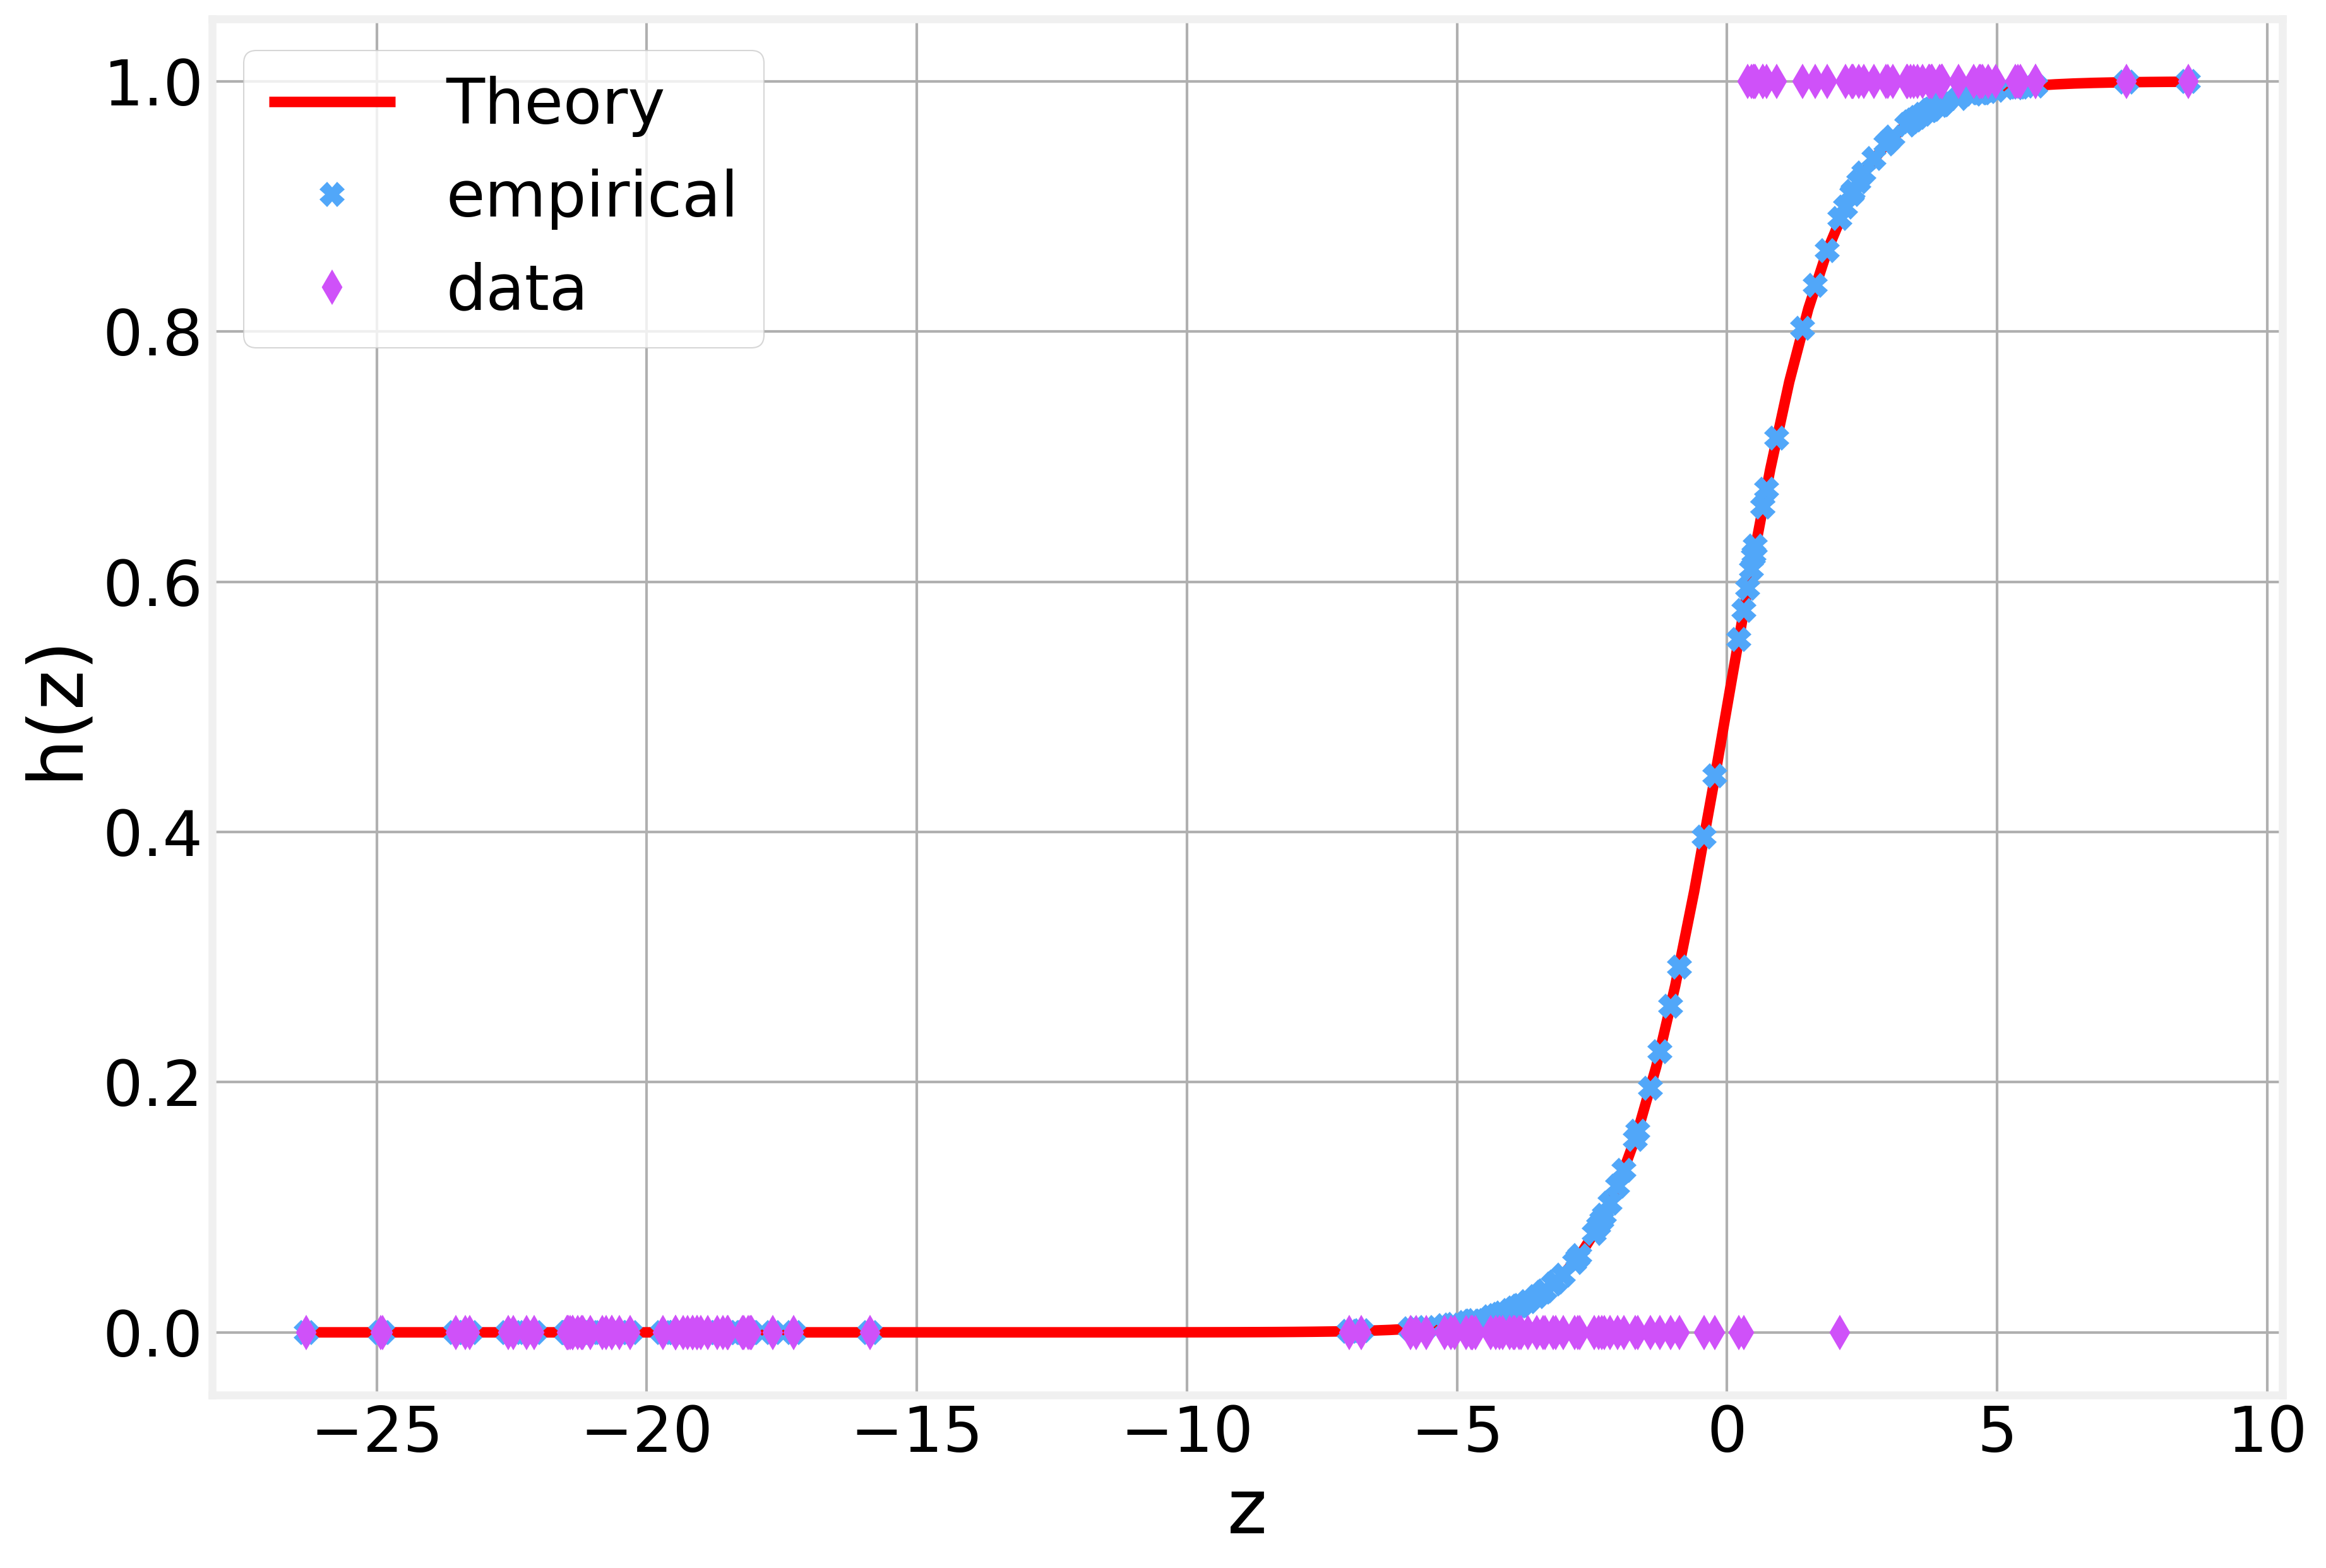

In [15]:
plot_boundary(Zs, Hs, y)

Utility function to plot labeled points

In [16]:
def plot_points(data, features, weights, label='y'):
    plt.plot(data[features[0]][data[label]==0], data[features[1]][data[label]==0], '*', label='y=0', markersize=8)
    plt.plot(data[features[0]][data[label]==1], data[features[1]][data[label]==1], 'd', label='y=1', markersize=8)

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.gcf().set_size_inches(11, 8)
    plt.legend()

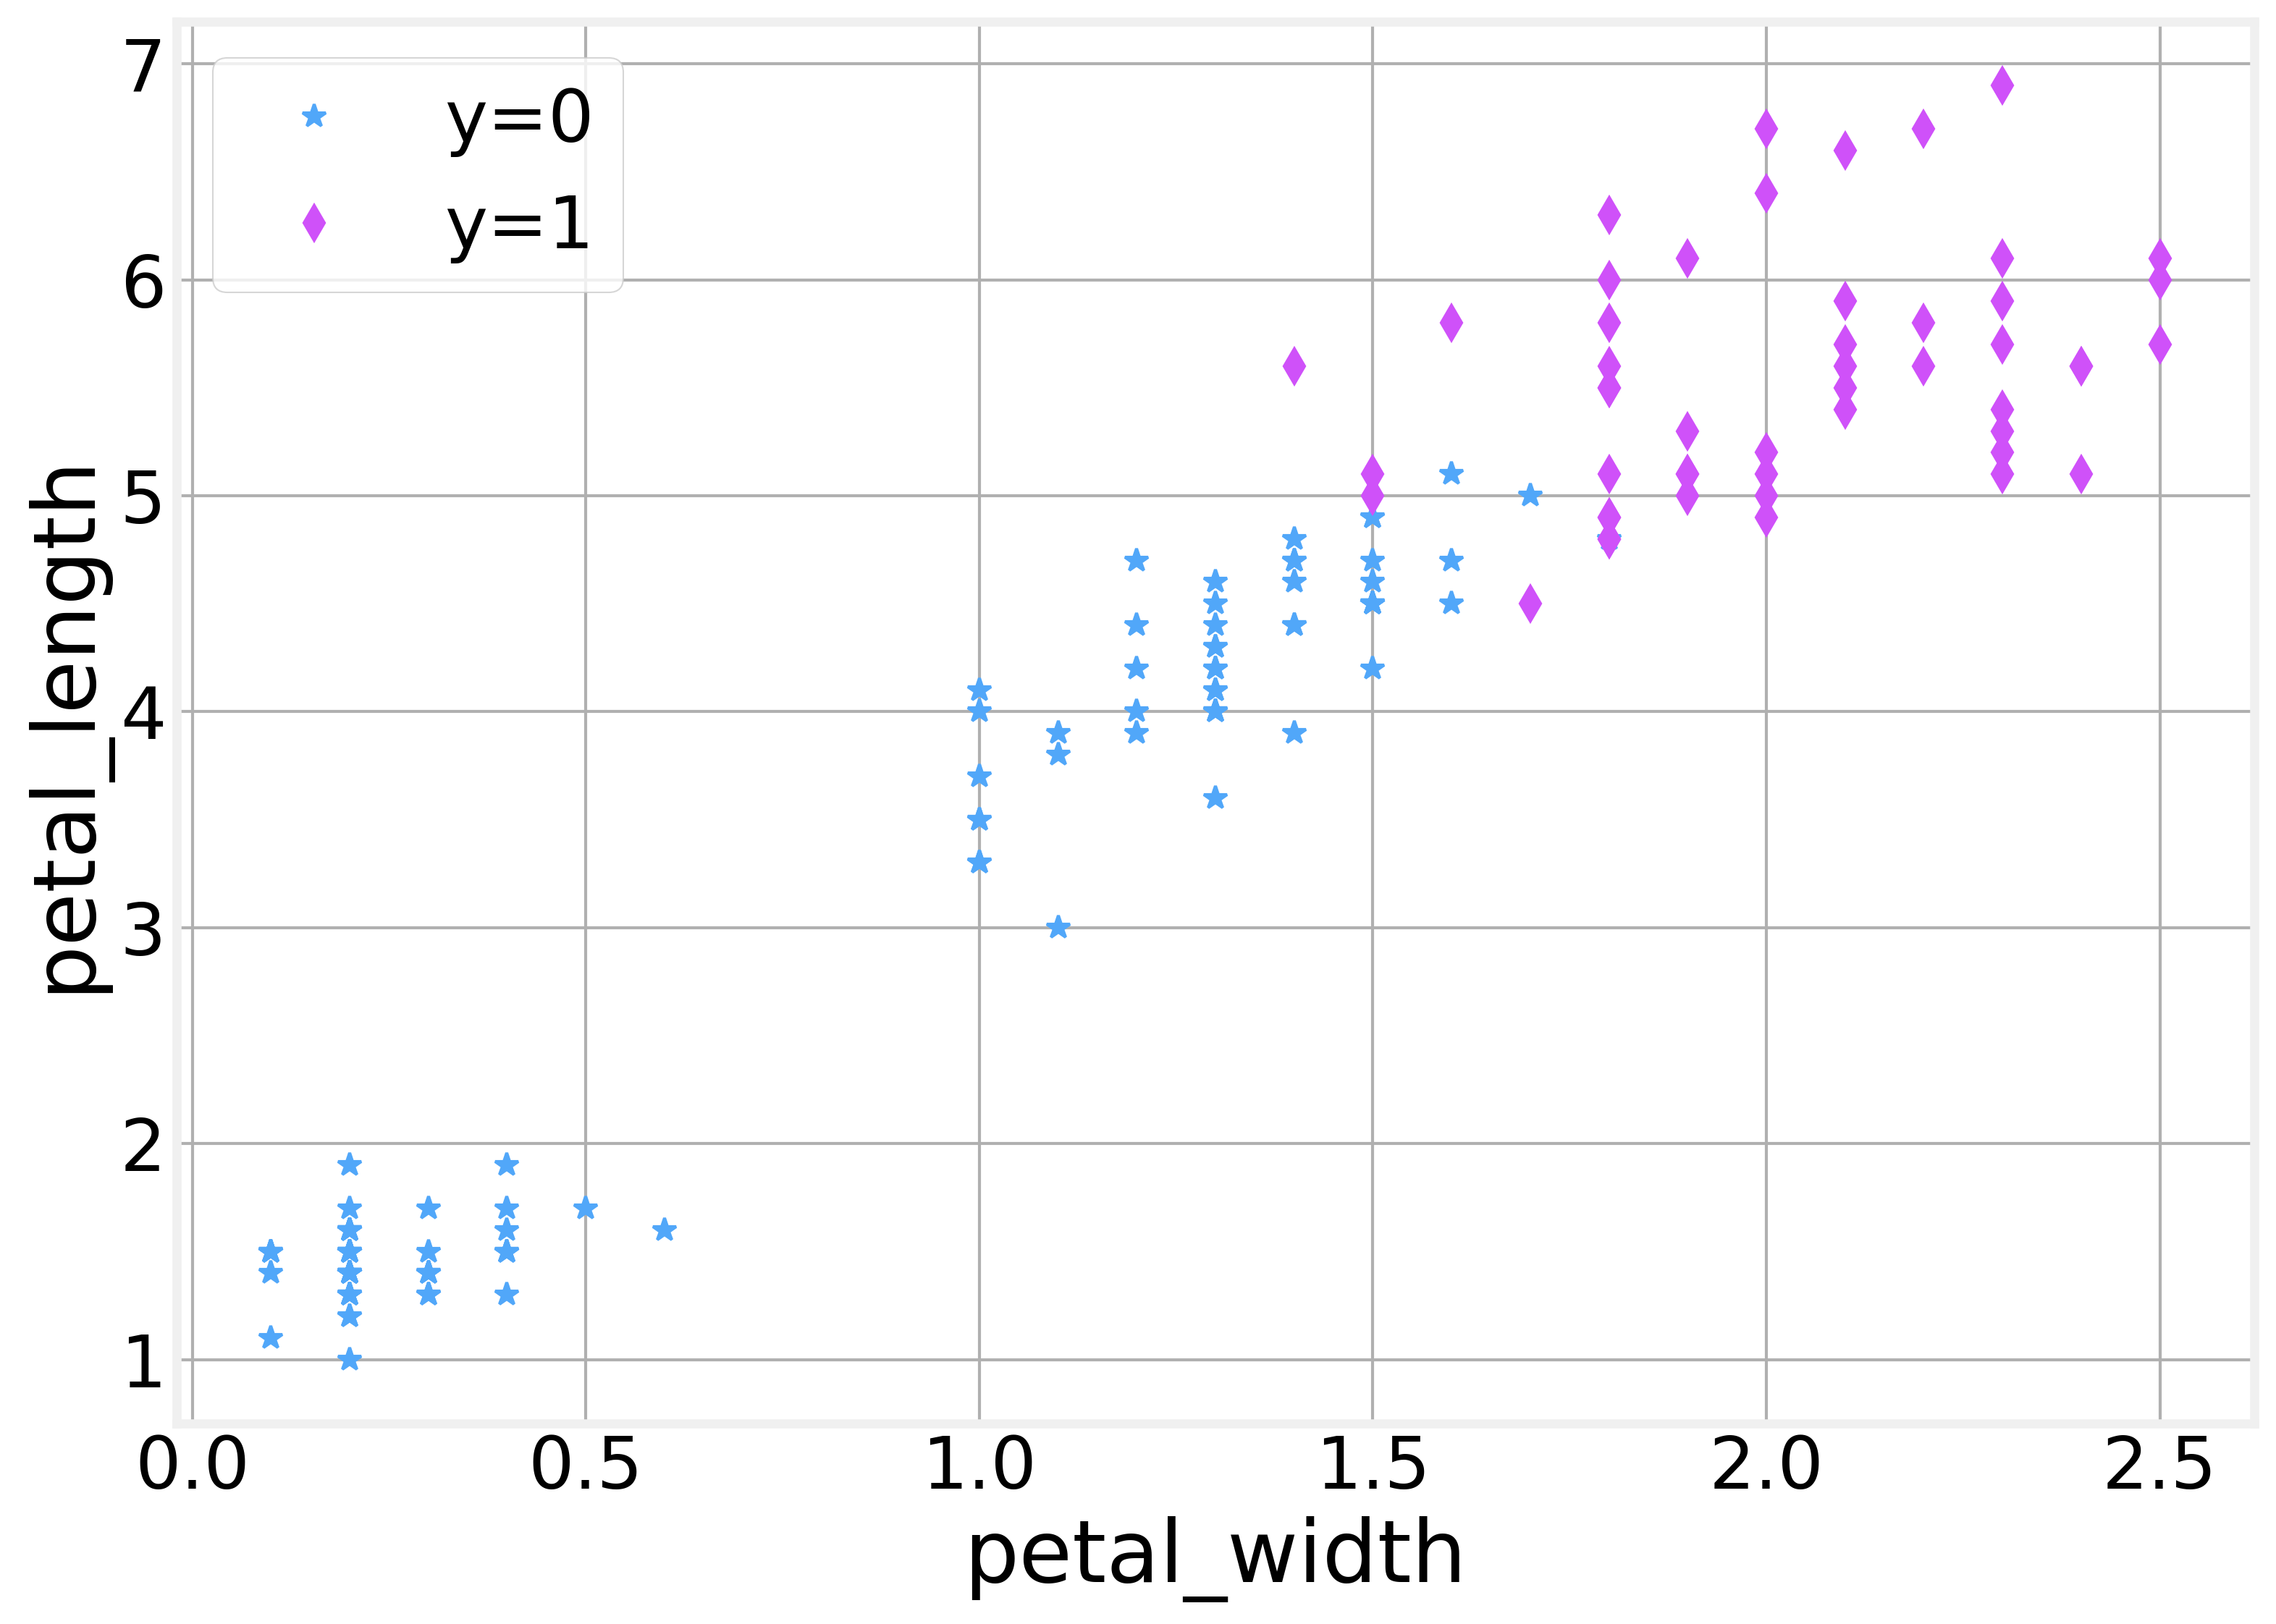

In [17]:
plot_points(data, ['petal_width', 'petal_length'], weights)

The separation bounday is not perfect here either

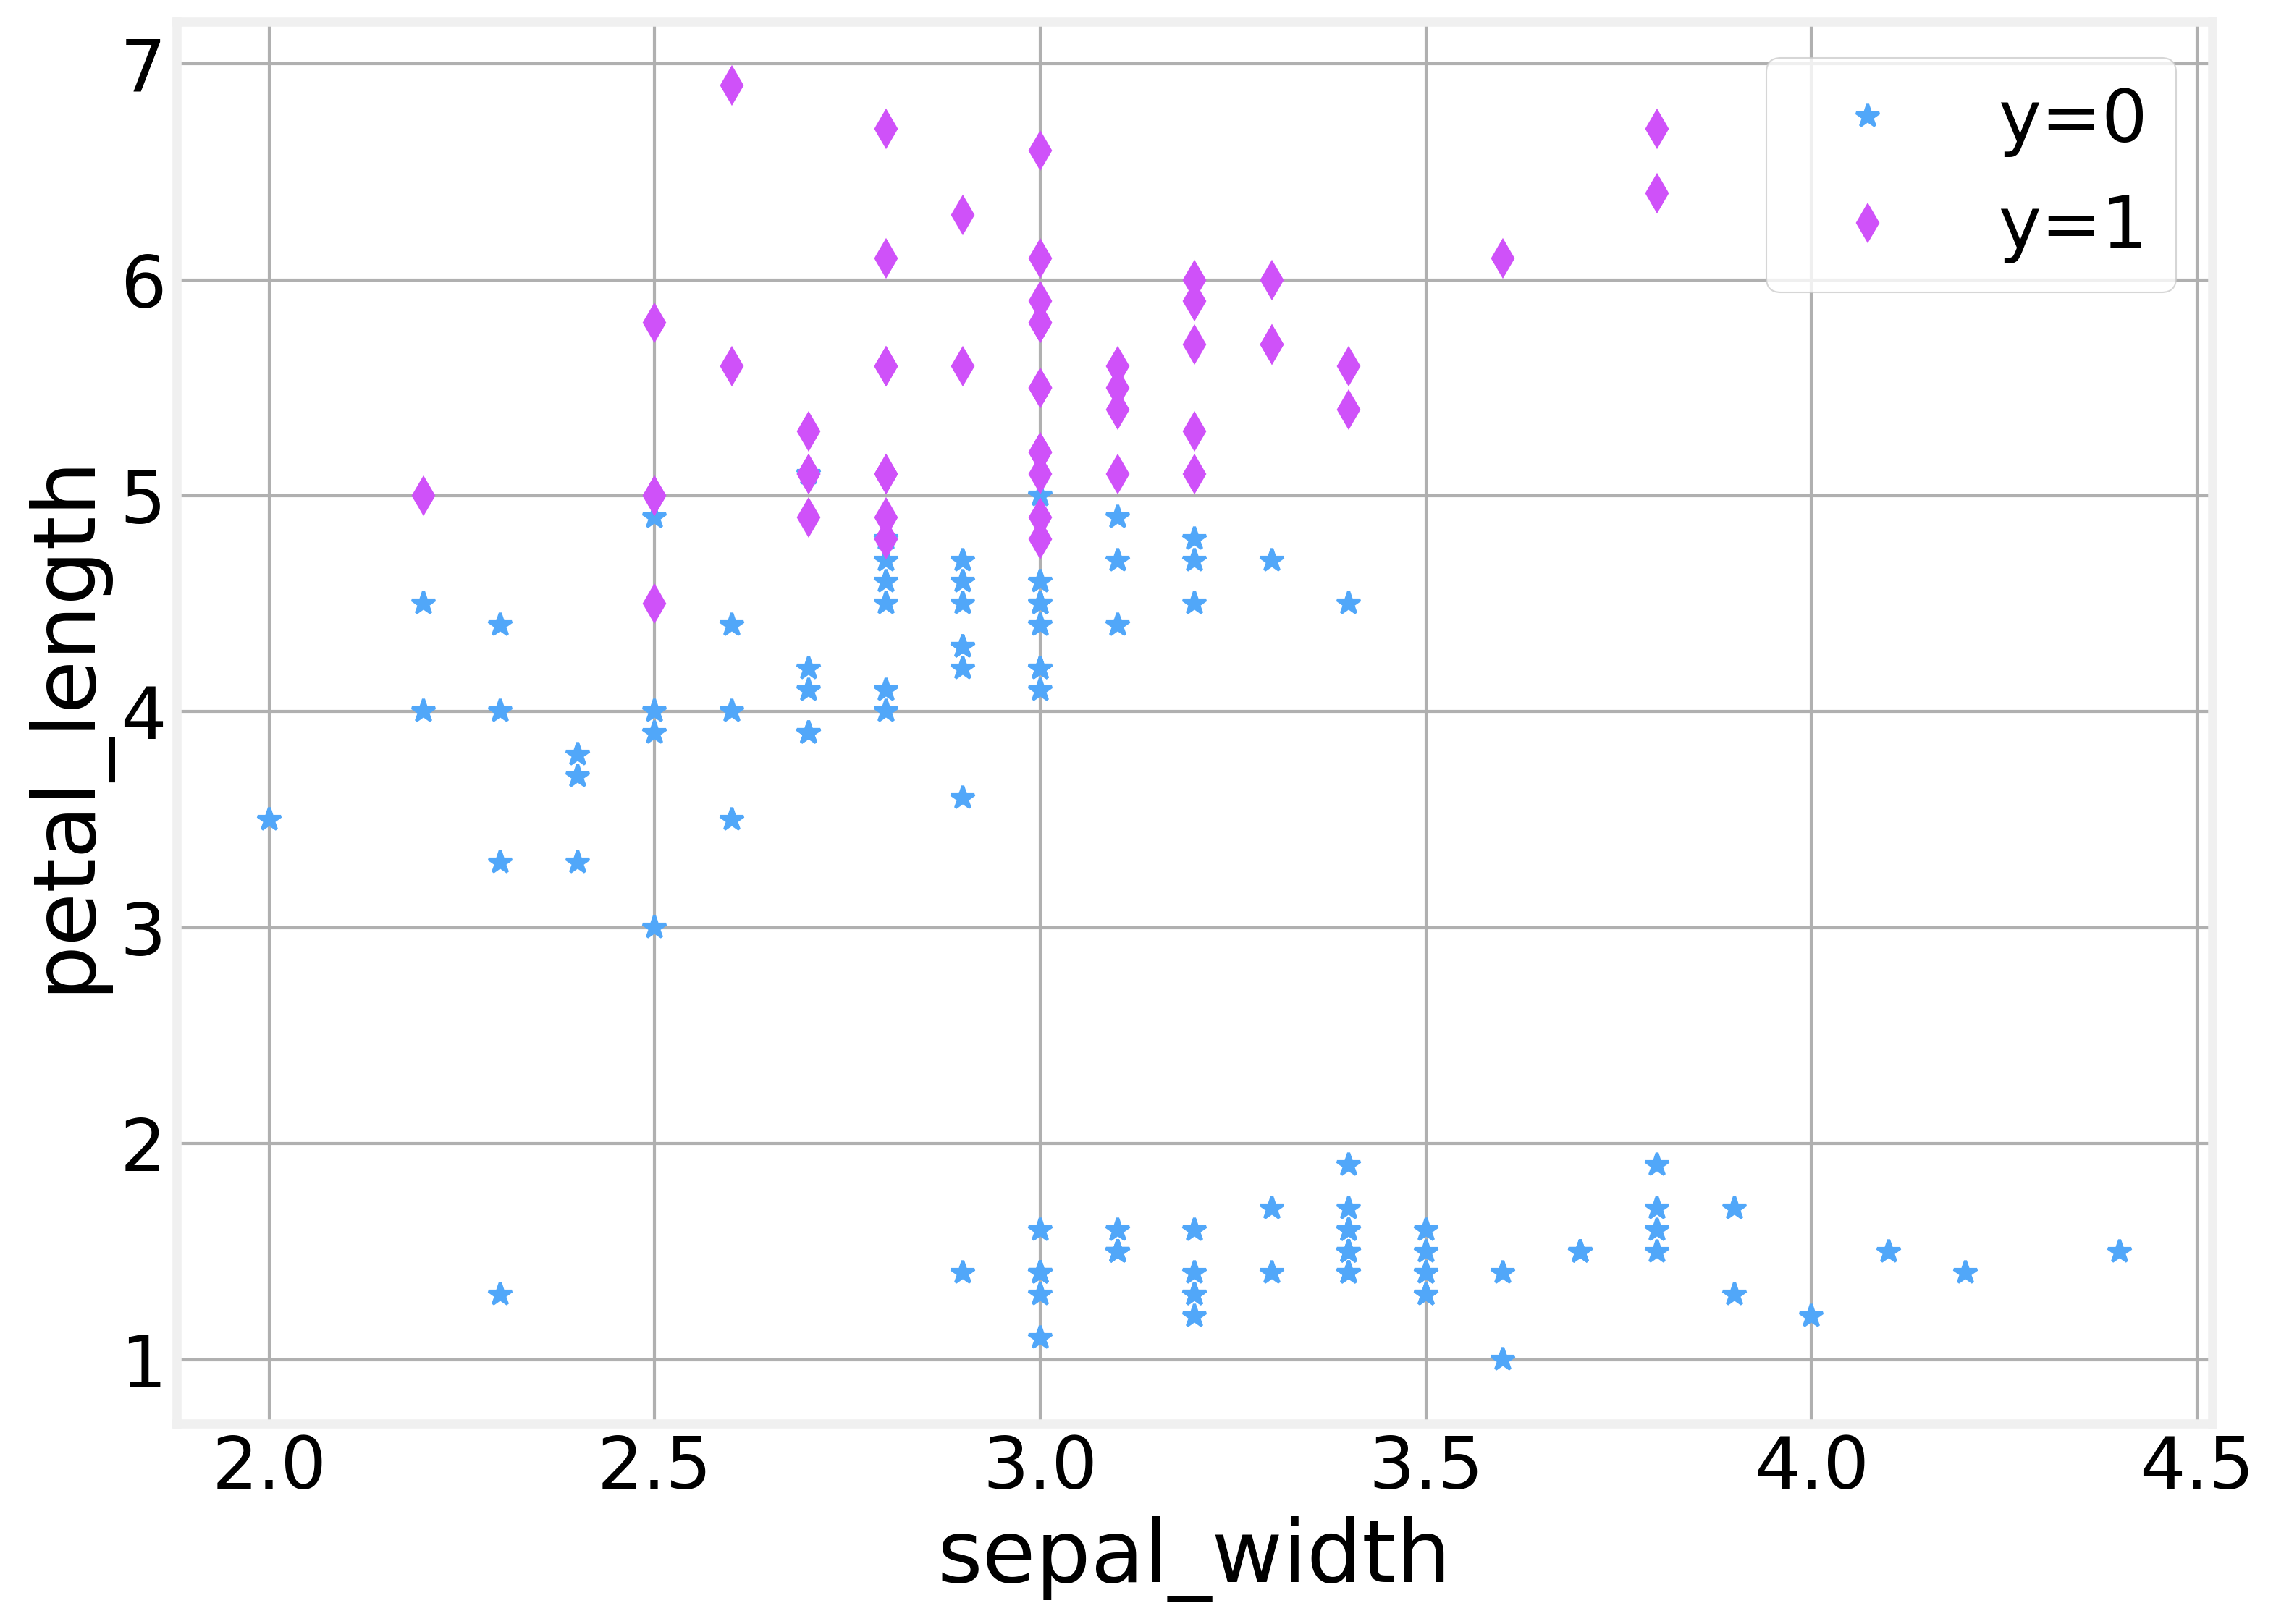

In [18]:
plot_points(data, ['sepal_width', 'petal_length'], weights)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>